In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

# Problem 1: Clustering


A leading bank wants to develop a customer segmentation to give promotional offers to its customers. 
They collected a sample that summarizes the activities of users during the past few months. 
You are given the task to identify the segments based on credit card usage.

1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [2]:
df=pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.shape

(210, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
df.describe(include='all')

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [7]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

# null value check
df.isna().sum()

Number of duplicate rows = 0


spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

There are no duplicate values, no null values present in the dataset

# Univariate Analysis

<AxesSubplot:>

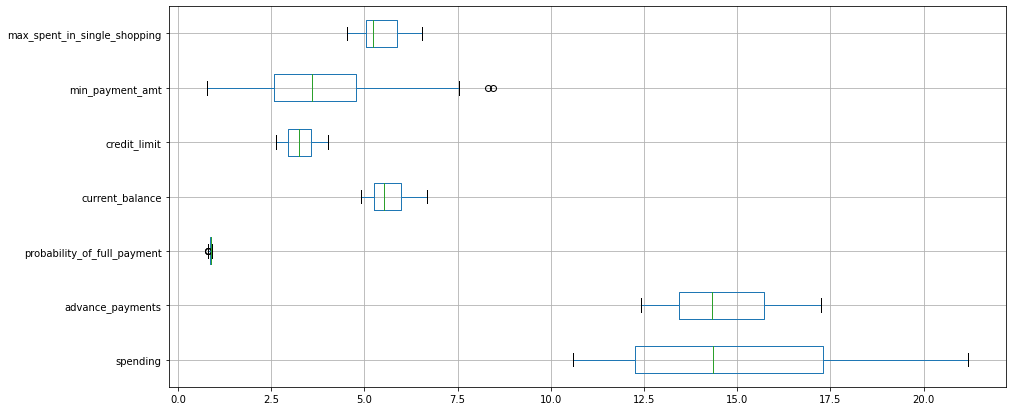

In [8]:
df.boxplot(figsize=(15,7),grid=True,vert=0)

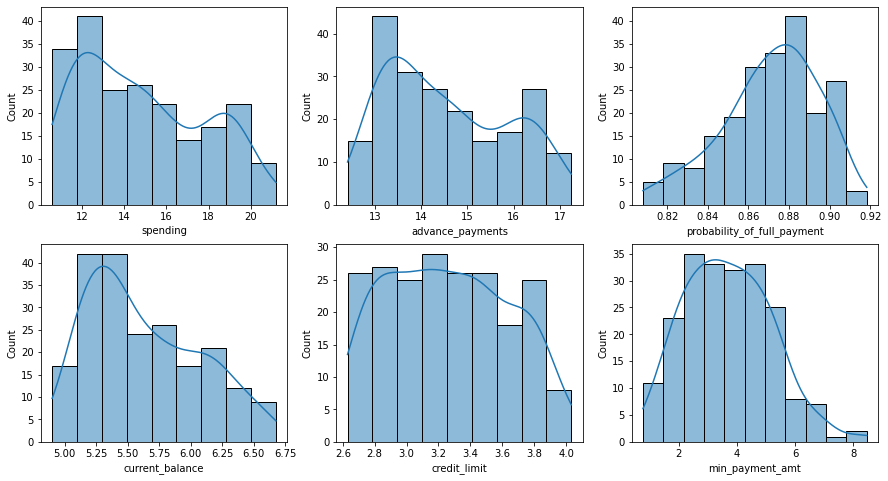

In [9]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(15,8)
sns.histplot(df['spending'], kde=True, ax=axes[0][0])
sns.histplot(df['advance_payments'], kde=True, ax=axes[0][1])
sns.histplot(df['probability_of_full_payment'], kde=True, ax=axes[0][2])
sns.histplot(x='current_balance', data=df , kde=True,ax=axes[1][0])
sns.histplot(df['credit_limit'], kde=True, ax=axes[1][1])
sns.histplot(x='min_payment_amt', data=df , kde=True,ax=axes[1][2])
plt.show()

<AxesSubplot:xlabel='max_spent_in_single_shopping', ylabel='Count'>

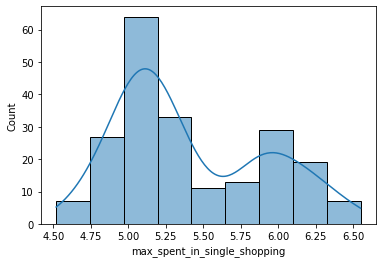

In [10]:
sns.histplot(df['max_spent_in_single_shopping'], kde=True)

Observations from Univariate Analysis:
    
    All data variables are continuous integers and no categorical/ordinal variable is present. Hence, regression model would be appropriate
    
    Outliers effect is very minimal as the dataset does not have outlier presence except for 'min_payment_amt' & 'probability_of_full_payment'
    
    Data is Normally distributed with slight skew for almost all features except for credit_limit , max_spent_in_single_shopping

# Bi-Variate Analysis

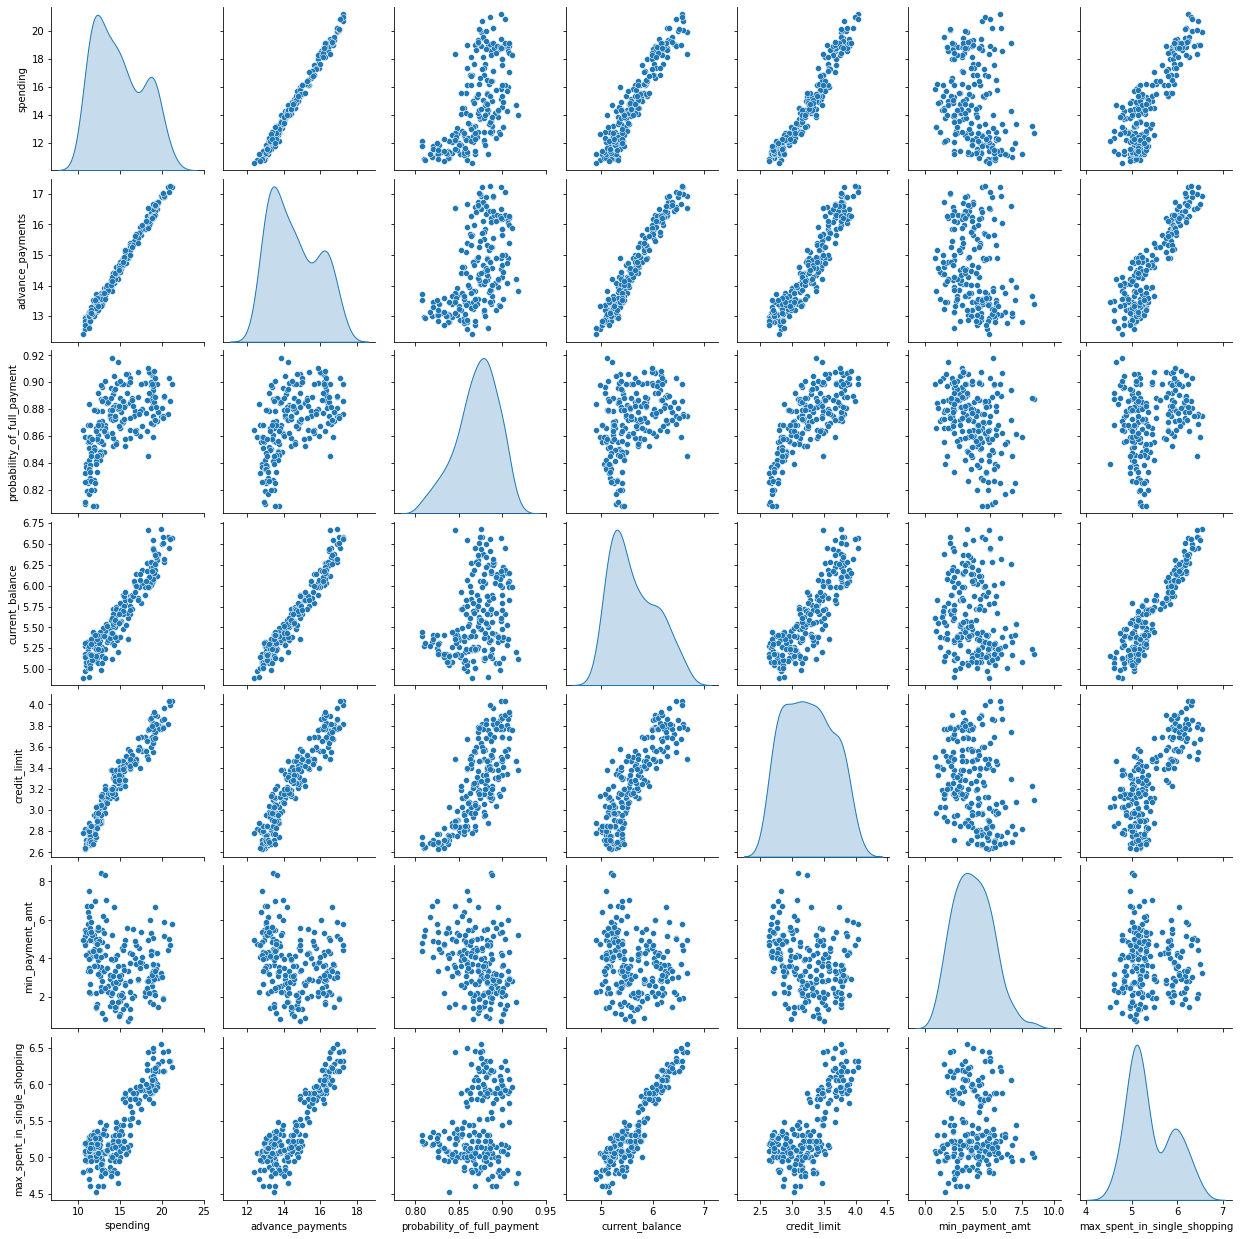

In [11]:
sns.pairplot(df,diag_kind='kde')

<AxesSubplot:xlabel='spending', ylabel='credit_limit'>

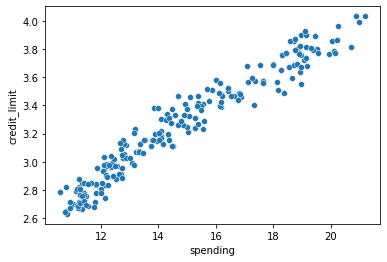

In [12]:
sns.scatterplot(x=df.spending, y=df.credit_limit,data=df)

With higher credit limit, spending also increases

<AxesSubplot:xlabel='current_balance', ylabel='max_spent_in_single_shopping'>

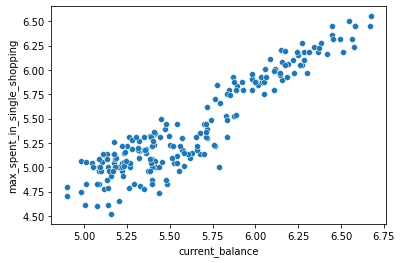

In [13]:
sns.scatterplot(x=df.current_balance, y=df.max_spent_in_single_shopping,data=df)

As the current balance increases, maximum amount spent in single shopping also is on the increase, advance payments and spending also increases

# Multivariate Analysis

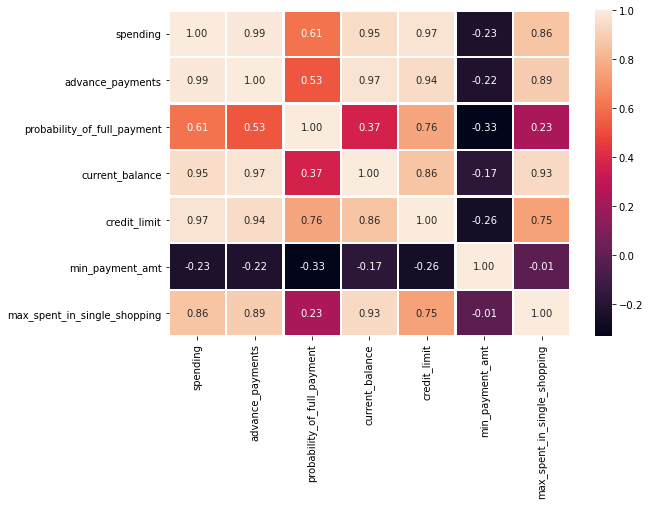

In [14]:
corr = df.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

Good co-relation exists between spending,advance_payments,current_balance,credit_limit

Poor/Bad co-relation exists between minimum payment amount, advance payments, probability of full payment, 
current balance and credit limit

# 1.2  Do you think scaling is necessary for clustering in this case? Justify

Yes, scaling is necessary for the data because all the variables of the data set are of different scales i.e. one variable (credit limit) is in 10000s and other variable (current balance, spending) is in 1000s. Since the data in these variables are of different scales, it is tough to compare these variables.

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data is varying widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.In this method, we convert variables with different scales of measurements into a single scale.

StandardScaler normalizes the data using the formula (x-mean)/standard deviation. This can also be done with the apply 'zscore'

To make analysis, it is important to bring all the variables on a same scale. 

Hence Scaling the data is necessary for clustering

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaled=StandardScaler().fit_transform(df)

In [17]:
scaled_data=pd.DataFrame(scaled,index=df.index, columns=df.columns)
scaled_data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


# 1.3 Apply hierarchical clustering to scaled data.  Identify the number of optimum clusters using Dendrogram and briefly describe them
   

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [19]:
HClust1 = linkage(scaled_data, method = 'ward')

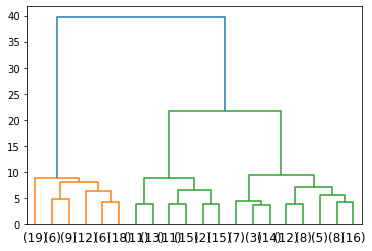

In [20]:
dend1 = dendrogram(HClust1,truncate_mode='lastp',p=20)

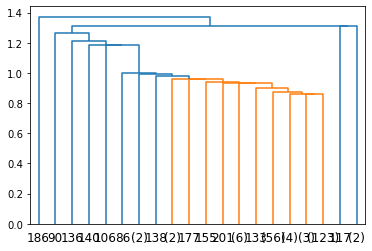

In [21]:
HClust2 = linkage(scaled_data, method = 'single')
dend2= dendrogram(HClust2,truncate_mode='lastp',p=20)

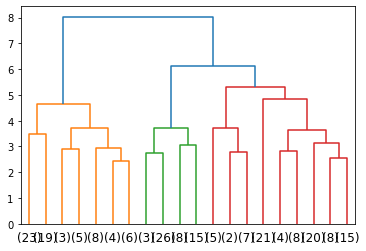

In [22]:
HClust3 = linkage(scaled_data, method = 'complete')
dend3= dendrogram(HClust3,truncate_mode='lastp',p=20)

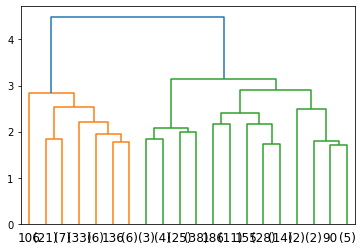

In [23]:
HClust4 = linkage(scaled_data, method = 'average')
dend4= dendrogram(HClust4,truncate_mode='lastp',p=20)

From the different methods used - 'single','complete','ward' and 'average' - it is clear that,
the optimum number of clusters is 3. With more than 3 clusters, the variance - distance between lines become insignificant

In [24]:
from scipy.cluster.hierarchy import fcluster

In [25]:
clusters = fcluster(HClust1, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [26]:
df['H_clusters'] = clusters
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [27]:
df.H_clusters.value_counts()

3    73
1    70
2    67
Name: H_clusters, dtype: int64

In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')
agglo_cluster=cluster.fit_predict(scaled_data)
print(agglo_cluster)
df['agglo_cluster']=agglo_cluster
df.agglo_cluster.value_counts().sort_index()

[1 0 1 2 1 0 2 2 1 2 1 1 2 1 0 0 0 2 2 2 2 2 1 2 0 1 0 2 2 2 2 2 2 0 2 2 2
 2 2 1 1 0 1 1 2 2 0 1 1 1 2 1 1 1 1 1 2 2 2 1 0 2 2 1 0 1 1 0 1 2 0 2 1 1
 2 1 0 2 1 0 0 0 0 1 2 1 1 1 1 0 0 1 0 2 2 1 1 1 2 1 0 1 0 1 0 1 1 2 0 1 1
 0 1 2 2 1 0 0 2 1 0 2 2 2 0 0 1 2 0 0 2 0 0 1 2 1 1 2 1 0 0 0 2 2 2 2 1 2
 0 2 0 2 0 1 0 0 2 2 0 1 1 2 1 1 1 2 1 0 0 2 0 2 0 1 1 1 0 2 0 2 0 2 0 0 1
 1 0 1 0 2 0 0 2 1 0 1 1 2 1 2 0 0 0 2 1 0 1 0 0 1]


0    65
1    75
2    70
Name: agglo_cluster, dtype: int64

In [30]:
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')
agglo_cluster=cluster.fit_predict(scaled_data)
print(agglo_cluster)
df['agglo_cluster']=agglo_cluster
df.agglo_cluster.value_counts().sort_index()

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


0      3
1      1
2    206
Name: agglo_cluster, dtype: int64

In [31]:
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
agglo_cluster=cluster.fit_predict(scaled_data)
print(agglo_cluster)
df['agglo_cluster']=agglo_cluster
df.agglo_cluster.value_counts().sort_index()

[1 2 1 0 1 0 0 2 1 0 1 2 0 1 0 0 2 0 0 0 0 0 1 0 2 1 0 0 0 0 2 0 0 2 0 0 0
 0 0 1 1 2 1 1 0 0 0 1 1 1 0 1 1 1 1 2 0 0 0 1 2 0 0 2 2 1 1 2 1 0 2 0 1 1
 0 1 2 0 1 2 2 0 2 1 0 2 1 1 1 0 0 1 2 0 0 1 1 1 0 1 0 1 2 1 2 1 1 0 0 1 1
 2 1 0 0 1 2 0 0 1 0 0 0 0 2 2 1 0 2 2 0 2 0 1 0 1 1 0 1 0 0 2 0 0 0 0 1 0
 2 0 2 0 2 2 0 2 0 0 2 1 1 0 1 1 1 0 1 2 0 0 2 0 2 1 1 1 2 0 2 0 2 0 0 2 2
 1 0 2 0 0 0 2 0 1 2 1 1 0 1 0 2 2 2 0 1 0 1 2 2 1]


0    90
1    68
2    52
Name: agglo_cluster, dtype: int64

In [32]:
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
agglo_cluster=cluster.fit_predict(scaled_data)
print(agglo_cluster)
df['agglo_cluster']=agglo_cluster
df.agglo_cluster.value_counts().sort_index()

[1 0 1 2 1 2 2 0 1 2 1 0 2 1 0 2 0 2 0 2 2 2 1 2 0 1 0 2 2 2 0 2 2 0 2 2 2
 2 2 1 1 0 1 1 2 2 0 1 1 1 2 1 1 1 1 1 2 2 2 1 0 2 2 0 0 1 1 0 1 2 0 2 1 1
 2 1 0 2 1 0 0 0 0 1 2 0 0 1 1 2 0 1 0 2 2 1 1 1 2 1 2 1 0 1 0 1 1 2 2 1 0
 0 1 2 2 1 0 0 2 1 0 2 2 2 0 0 1 2 0 0 2 0 0 1 2 1 1 2 1 0 0 0 2 2 0 2 1 2
 0 2 0 2 0 0 0 0 0 2 0 1 1 2 1 1 1 2 1 0 0 0 0 2 0 1 1 1 0 0 1 2 0 0 0 0 1
 1 0 0 0 2 0 0 2 1 0 1 1 2 1 2 0 1 0 2 1 0 1 0 1 0]


0    73
1    70
2    67
Name: agglo_cluster, dtype: int64

The number of cluster groups is the same in both 'Hierarchical Clustering' and 'Agglomerative Clustering' method.

Usage of 'Ward' method has produced almost equal number of customers for each cluster and is appropriate

<AxesSubplot:xlabel='agglo_cluster', ylabel='count'>

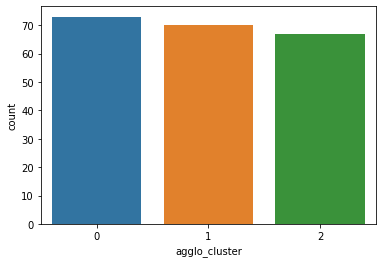

In [33]:
sns.countplot(x=df['agglo_cluster'])

Custer segmentation is done with 3 groups

# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters (2 pts). 
Apply elbow curve and silhouette score (3 pts). Interpret the inferences from the model (2.5 pts). K-means clustering code application with different number of clusters. Calculation of WSS(inertia for each value of k) Elbow Method must be applied and visualized with different values of K. Reasoning behind the selection of the optimal value of K must be explained properly. Silhouette Score must be calculated for the same values of K taken above and commented on. Report must contain logical and correct explanations for choosing the optimum clusters using both elbow method and silhouette scores. Append cluster labels obtained from K-means clustering into the original data frame. 
Customer Segmentation can be visualized using appropriate graphs.

In [34]:
from sklearn.cluster import KMeans

In [35]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_data)

KMeans(n_clusters=4)

In [36]:
k_means.inertia_

371.29354819439664

In [37]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_data)
labels=k_means.labels_
k_means.inertia_

430.6589731513006

In [38]:
wss=[]

for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_data)
    wss.append(KM.inertia_)
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.30172127754196,
 326.3625415410697,
 288.7694577022641,
 262.71883538040635,
 240.56181002386353,
 221.35311308570328,
 206.9223568661357]

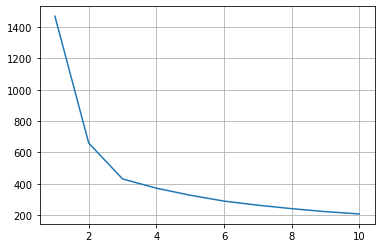

In [39]:
plt.plot(range(1,11), wss)
plt.grid()

In [40]:
df["Clus_kmeans"] = labels
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,agglo_cluster,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,1


In [41]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [42]:
silhouette_score(scaled_data,labels)

0.4007270552751299

In [43]:
sil_width = silhouette_samples(scaled_data,labels)

In [44]:
df["sil_width"] = sil_width
df.head(15)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,agglo_cluster,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,1,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0,0,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,1,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2,2,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,1,0.362276
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,2,2,2,0.218446
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2,2,2,0.472867
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,3,0,0,0.361812
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1,1,1,0.520285
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2,2,2,0.532517


In [45]:
silhouette_samples(scaled_data,labels).min()

0.002713089347678533

<AxesSubplot:xlabel='Clus_kmeans', ylabel='count'>

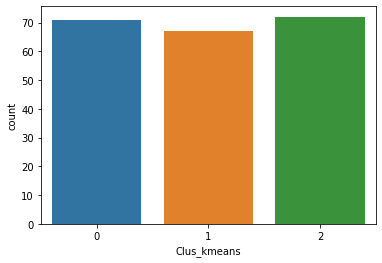

In [46]:
sns.countplot(x=df['Clus_kmeans'])

<AxesSubplot:xlabel='H_clusters', ylabel='count'>

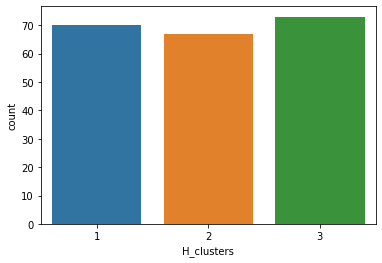

In [47]:
sns.countplot(x=df['H_clusters'])

<AxesSubplot:xlabel='agglo_cluster', ylabel='count'>

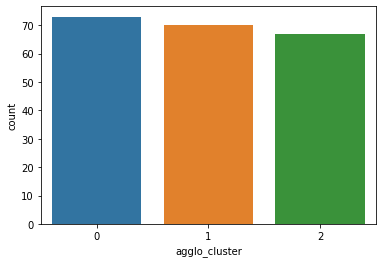

In [48]:
sns.countplot(x=df['agglo_cluster'])

In [49]:
from yellowbrick.cluster import KElbowVisualizer

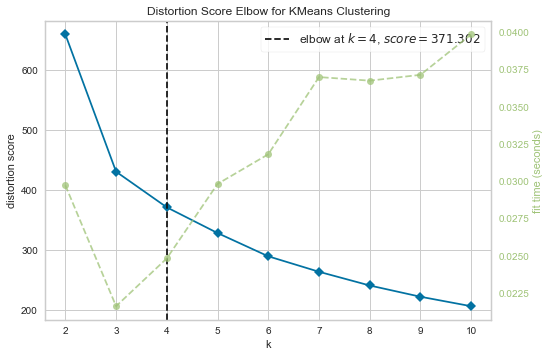

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
model=KMeans()
visualizer = KElbowVisualizer(model,
                              k=(2,11),
                              metric='distortion'
                              )
visualizer.fit(scaled_data)
visualizer.poof()

Elbow visualizer clearly tells that going with 3 clusters is optimum.
Metric 'distortion'is for WSS -  mean sum of squared distances to centers
Metric 'silhouette': mean ratio of intra-cluster and nearest-cluster distance

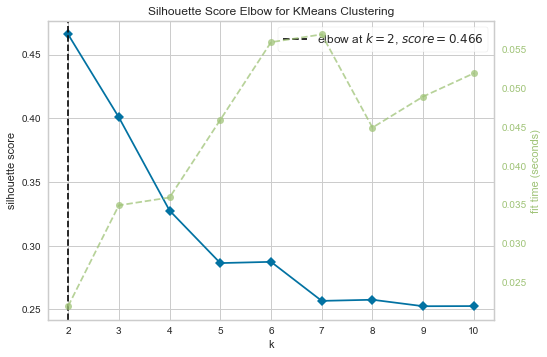

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [51]:
model=KMeans()
visualizer = KElbowVisualizer(model,
                              k=(2,11),
                              metric='silhouette'
                              )
visualizer.fit(scaled_data)
visualizer.poof()

In [52]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_data)
labels=k_means.labels_
k_means.inertia_
silhouette_score(scaled_data,labels)

0.4007270552751299

In [53]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_data)
labels=k_means.labels_
k_means.inertia_
silhouette_score(scaled_data,labels)

0.3291966792017613

In [54]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_data)
labels=k_means.labels_
k_means.inertia_
silhouette_score(scaled_data,labels)

0.32989692304343726

In [55]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_data)
labels=k_means.labels_
k_means.inertia_
silhouette_score(scaled_data,labels)

0.46577247686580914

In [56]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_data)
labels=k_means.labels_
k_means.inertia_
silhouette_score(scaled_data,labels)

0.4007270552751299

Silhouette is a method to determine optimal number of clusters for given dataset. It defines as
a coefficient of measure of how similar an observation to its own cluster compared to that of other
clusters. The range of silhouette coefficient varies between -1 to 1. 1 value indicate that an observation
is far from its neighbouring cluster and close to its own whereas -1 denotes that an observation is close
to neighbouring cluster than its own cluster. The 0 value indicate the presence of observation on
boundary of two clusters

Silhoutte score for 3 clusters is 0.4, which indicates that the observations in each clusters are separated from each other

# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [57]:
clust_profile = df.drop(['H_clusters','agglo_cluster','sil_width'],axis=1)
clust_profile = clust_profile.groupby('Clus_kmeans').mean()
clust_profile 

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
Clus_kmeans,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701
2,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722


In [58]:
clust_profile['freq'] = df.Clus_kmeans.value_counts().sort_index()
clust_profile 

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Clus_kmeans,,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
2,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,72


Cluster 0: Low spending group

1. Though the credit limit of low spending group is comparatively lower than medium spending group they do spend high amount in a single  shopping
2. Their probability of making full payment is less; also advance payments made by this group of customers is very less.
   Hence action needs to be taken to improve these factors
3. Minimum amount paid by the customer while making payments for purchases made monthly is higher and hence promotional offers 
an be offered to retain the stats

Cluster 1: High spending group

1. Advance amount paid by the customer in cash  is the highest for this group and the probability of making full payment is also the highest. Promotional Offers to this group can focus on these aspects.
2. They maintain high current balance, interest rates on current account amount can be made benefical to this group.
3. Discount vouchers can be given to this group for spending maximum amount in a single shopping. 

Cluster 2: Medium spending group

1. Appreciation in terms of cash back/reward points can be done for these people as their probability of making full payment is almost equal with respect to the high spend group. 
2. They maintain good current balance and their credit limit is equally good
3. Minimum paid by the customer while making payments for purchases made monthly is the lowest for this group and hence appropriate action to improve this factor can be considered

# Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).
2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network
2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 
2.4 Final Model: Compare all the models and write an inference which model is best/optimized.
2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

2.1 Read the data and do exploratory data analysis (4 pts). 
Describe the data briefly. Interpret the inferences for each (2 pts). 
Initial steps like head() .info(), Data Types, etc . Null value check. 
Distribution plots(histogram) or similar plots for the continuous columns. 
Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. 
Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. 
There is no restriction on how the learner wishes to implement this but the code should be 
able to represent the correct output and inferences should be logical and correct.

In [59]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [60]:
data=pd.read_csv('insurance_part2_data.csv')

In [61]:
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [62]:
data.shape

(3000, 10)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


Claimed is the target variable while all others are the predictors.

Out of the 10 columns, 6 are object type, 2 are float type, while remaining 2 are int.
Object - Agency_Code, Type,Claimed, Channel, Product Name and Destination
Float - Commision, Sales
Int - Age, Duration

Many columns are of type object i.e. strings. These need to be converted to ordinal type

It appears there are also no missing values.

In [64]:
data.describe(include='all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


# Geting unique counts of all Objects

In [65]:
print('Claim Status \n',data.Claimed.value_counts())
print('\n')
print('Code of tour firm \n',data.Agency_Code.value_counts())
print('\n')
print('Type of tour insurance firms  \n',data.Type.value_counts())
print('\n')
print('Distribution channel of tour insurance agencies \n',data.Channel.value_counts())
print('\n')
print('Name of the tour insurance products \n',data['Product Name'].value_counts())
print('\n')
print('Destination of the tour  \n',data.Destination.value_counts())
print('\n')

Claim Status 
 No     2076
Yes     924
Name: Claimed, dtype: int64


Code of tour firm 
 EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


Type of tour insurance firms  
 Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


Distribution channel of tour insurance agencies 
 Online     2954
Offline      46
Name: Channel, dtype: int64


Name of the tour insurance products 
 Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64


Destination of the tour  
 ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64




Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types.

The following code loops through each column and checks if the column type is object then converts those columns into categorical with each distinct value becoming a category.

# Univariate Analysis

<AxesSubplot:xlabel='Claimed', ylabel='count'>

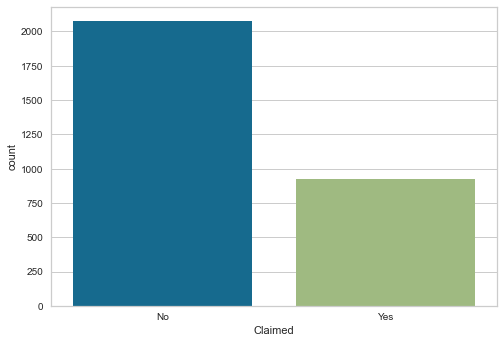

In [66]:
sns.countplot(x=data['Claimed'])

In [67]:
data.Claimed.value_counts(normalize=True)

No     0.692
Yes    0.308
Name: Claimed, dtype: float64

There are 30.8 % Claims 

<AxesSubplot:xlabel='Claimed', ylabel='count'>

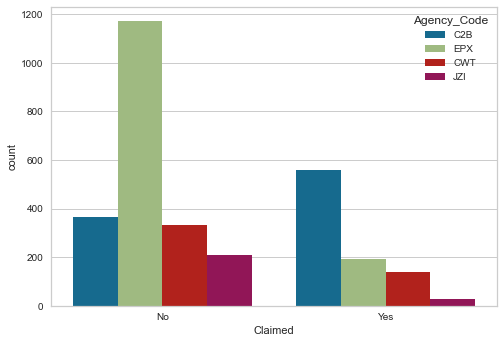

In [68]:
sns.countplot(x=data['Claimed'],hue=data['Agency_Code'])

<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

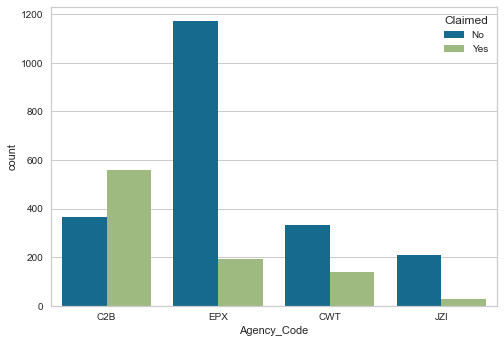

In [69]:
sns.countplot(x=data['Agency_Code'],hue=data['Claimed'])

In [70]:
data.Agency_Code.value_counts(normalize=True)

EPX    0.455000
C2B    0.308000
CWT    0.157333
JZI    0.079667
Name: Agency_Code, dtype: float64

Tour firm 'C2B' has maximum number of claims though it has registered lesser number of insurance registrations. 
Outrightly, claims from 'C2B' has some issues and it needs to be investigated

Tour firm 'EPX' has registered minimum number of claims

<AxesSubplot:xlabel='Type', ylabel='count'>

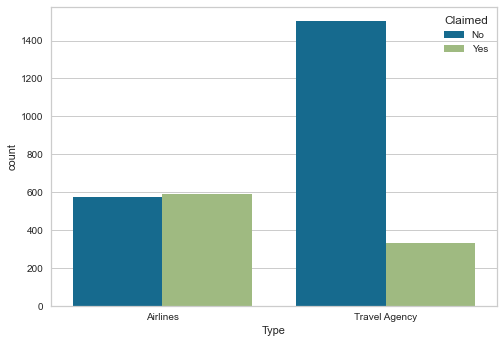

In [71]:
sns.countplot(x=data['Type'],hue=data['Claimed'])

<AxesSubplot:xlabel='Claimed', ylabel='count'>

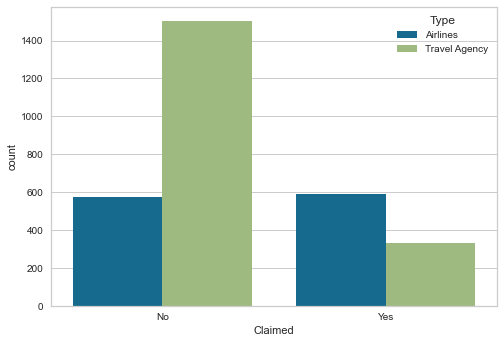

In [72]:
sns.countplot(x=data['Claimed'],hue=data['Type'])

<AxesSubplot:xlabel='Claimed', ylabel='count'>

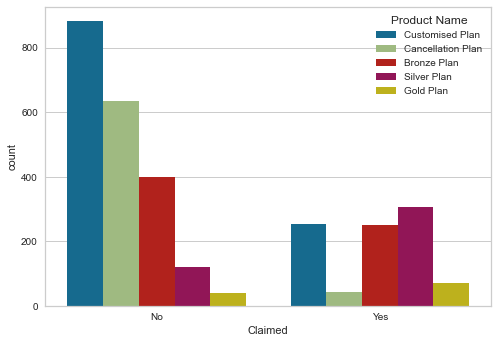

In [73]:
sns.countplot(x=data['Claimed'],hue=data['Product Name'])

<AxesSubplot:xlabel='Product Name', ylabel='count'>

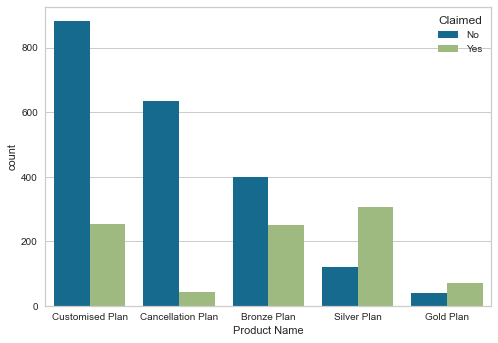

In [74]:
sns.countplot(x=data['Product Name'],hue=data['Claimed'])

In [75]:
data['Product Name'].value_counts(normalize=True)

Customised Plan      0.378667
Cancellation Plan    0.226000
Bronze Plan          0.216667
Silver Plan          0.142333
Gold Plan            0.036333
Name: Product Name, dtype: float64

* Silver Plan customers have more number of claims and Cancellation Plan customers have the minimum number of claims
* There are more number of customers in Customised Plan and less number of customers in Gold Plan

<AxesSubplot:xlabel='Destination', ylabel='count'>

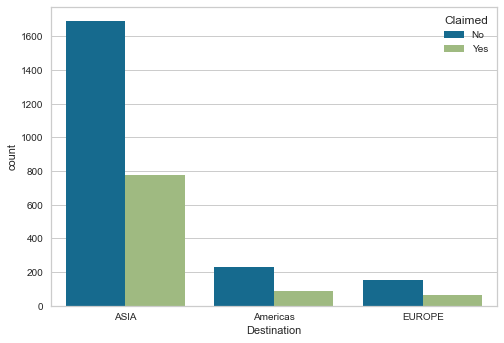

In [76]:
sns.countplot(x=data['Destination'],hue=data['Claimed'])

<AxesSubplot:xlabel='Claimed', ylabel='count'>

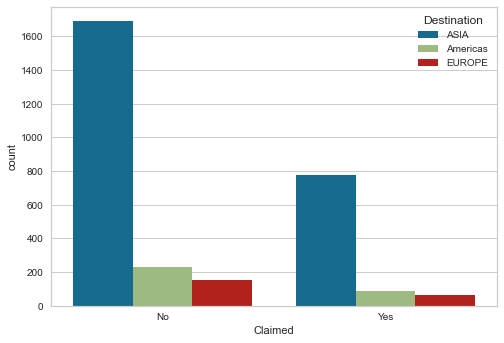

In [77]:
sns.countplot(x=data['Claimed'],hue=data['Destination'])

Tour Destination 'Asia' has the maximum number of Claims and tour destination 'Europe' has minimum number of claims

In [78]:
data.Type.value_counts(normalize=True)

Travel Agency    0.612333
Airlines         0.387667
Name: Type, dtype: float64

Airlines type registered more claims than Travel Agency type

In [79]:
data.Destination.value_counts(normalize=True)

ASIA        0.821667
Americas    0.106667
EUROPE      0.071667
Name: Destination, dtype: float64

<AxesSubplot:>

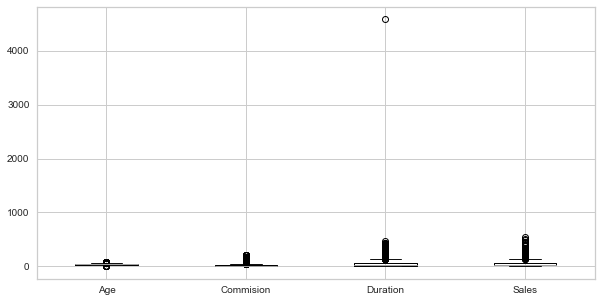

In [80]:
data.boxplot(figsize=(10,5),grid=True)

All the variables have outliers present

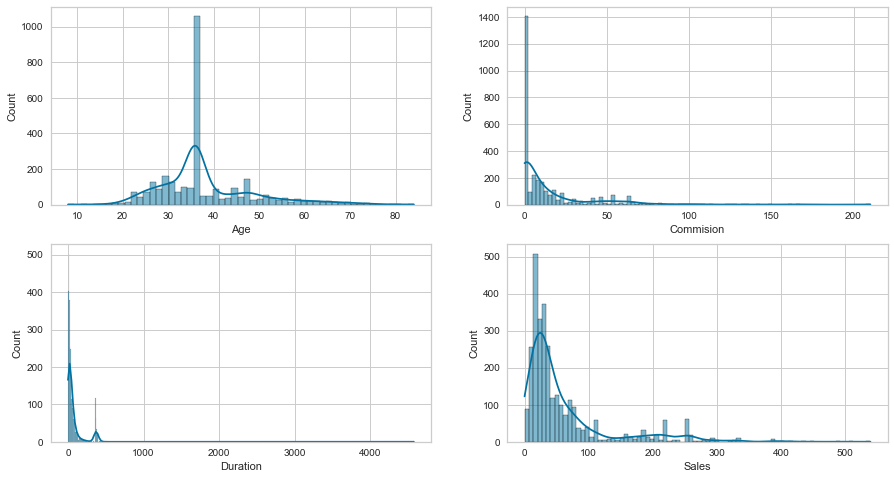

In [81]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,8)
sns.histplot(data['Age'], kde=True, ax=axes[0][0])
sns.histplot(data['Commision'], kde=True, ax=axes[0][1])
sns.histplot(data['Duration'], kde=True, ax=axes[1][0])
sns.histplot(x='Sales', data=data , kde=True,ax=axes[1][1])
plt.show()

Age is normally distributed
Commision, Duration and Sales are left skewed

# Bivariate Analysis

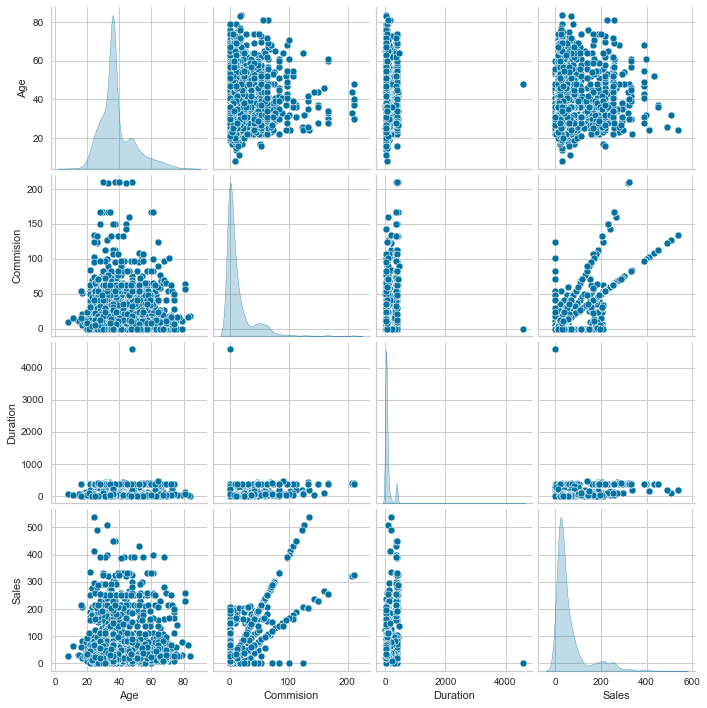

In [82]:
sns.pairplot(data,diag_kind='kde')

There is no relation between all of the variables and all are independent There is a slight correlation between sales and commission

# Multivariate Analysis

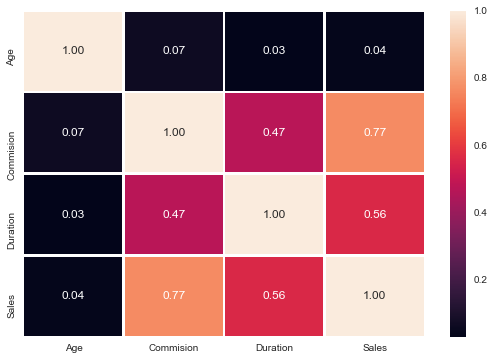

In [83]:
corr = data.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()


There is correlation between commision and sales variables.
Overall the magnitude of correlations between the variables are very less.

In [84]:
# Are there any missing values ?
data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

There are no missing values

In [85]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,agglo_cluster,Clus_kmeans,sil_width


# Converting all objects to categorical codes

In [86]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data[feature].unique()))
        print(pd.Categorical(data[feature].unique()).codes)
        data[feature] = pd.Categorical(data[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [87]:
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [88]:
data.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

There is no issue of class imbalance here as we have reasonable proportions in both the classes

# Extracting the target column into separate vectors for training set and test set

In [89]:
X = data.drop("Claimed", axis=1)

y = data.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


# Splitting data into training and test set

In [90]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

Data is split as 70% for Training and 30% for Test with random state as 1

# Checking the dimensions of the training and test data

In [91]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


# Building a Decision Tree Classifier

In [92]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [93]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

# Generating Tree

In [94]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, 
                                out_file= tree_regularized , 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

tree_regularized.close()
dot_data

# Variable Importance

In [95]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.599363
Sales         0.255785
Product Name  0.056555
Duration      0.037945
Age           0.030261
Commision     0.012676
Type          0.007416
Channel       0.000000
Destination   0.000000


Agency Code has the predominant effect on the number of claims and is the most important variable to be considered for analysis

# Predicting on Training and Test dataset

In [96]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

# Getting the Predicted Classes and Probs

In [97]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.935714,0.064286
1,0.529412,0.470588
2,0.358621,0.641379
3,0.234783,0.765217
4,0.924242,0.075758


# Model Evaluation

## AUC and ROC for the training data

AUC: 0.836


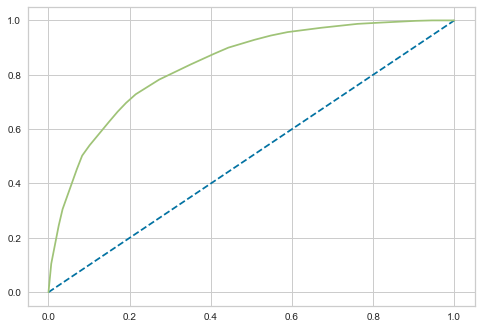

In [98]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

## AUC and ROC for the test data

AUC: 0.794


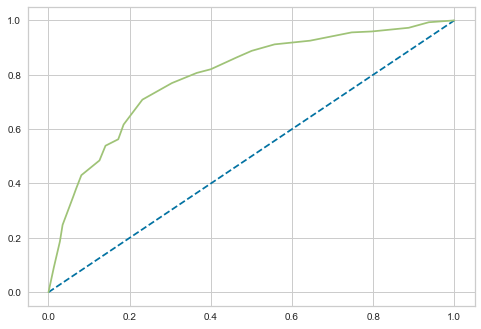

In [99]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

### Confusion Matrix for the training data

In [100]:
confusion_matrix(train_labels, ytrain_predict)

array([[1349,  122],
       [ 313,  316]], dtype=int64)

In [101]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7928571428571428

In [102]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1471
           1       0.72      0.50      0.59       629

    accuracy                           0.79      2100
   macro avg       0.77      0.71      0.73      2100
weighted avg       0.78      0.79      0.78      2100



In [103]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.72
cart_train_recall  0.5
cart_train_f1  0.59


### Confusion Matrix for test data

In [104]:
confusion_matrix(test_labels, ytest_predict)

array([[564,  41],
       [183, 112]], dtype=int64)

In [105]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7511111111111111

In [106]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       605
           1       0.73      0.38      0.50       295

    accuracy                           0.75       900
   macro avg       0.74      0.66      0.67       900
weighted avg       0.75      0.75      0.72       900



In [107]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.73
cart_test_recall  0.38
cart_test_f1  0.5


# Cart Conclusion

Train Data:

AUC: 83.6%

Accuracy: 79%

Precision: 72%

Recall:50%

f1-Score: 59%

Test Data:

AUC: 79.4%

Accuracy: 75%

Precision: 73%

Recall:38%

f1-Score: 50%

Training and Test set results are almost similar, and with the overall measures Ok, the model can be an acceptable model.


# Building a Random Forest Classifier

In [108]:
param_grid = {
    'max_depth': [10],## 20,30,40
    'max_features': [6],## 7,8,9
    'min_samples_leaf': [10],## 50,100
    'min_samples_split': [50], ## 60,70
    'n_estimators': [300] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [109]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10], 'max_features': [6],
                         'min_samples_leaf': [10], 'min_samples_split': [50],
                         'n_estimators': [300]})

In [110]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 300}

In [111]:
best_grid = grid_search.best_estimator_

In [112]:
best_grid

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=10,
                       min_samples_split=50, n_estimators=300, random_state=1)

### Predicting the Training and Testing data

In [113]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

#### RF Model Performance Evaluation on Training data

In [114]:
confusion_matrix(train_labels,ytrain_predict)

array([[1335,  136],
       [ 246,  383]], dtype=int64)

In [115]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8180952380952381

In [116]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1471
           1       0.74      0.61      0.67       629

    accuracy                           0.82      2100
   macro avg       0.79      0.76      0.77      2100
weighted avg       0.81      0.82      0.81      2100



In [117]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.74
rf_train_recall  0.61
rf_train_f1  0.67


Area under Curve is 0.8744205676464645


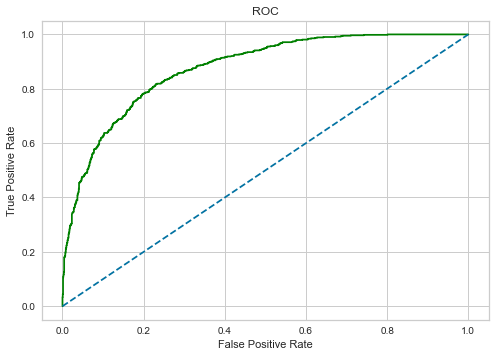

In [118]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

### RF Model Performance Evaluation on Test data

In [119]:
confusion_matrix(test_labels,ytest_predict)

array([[554,  51],
       [155, 140]], dtype=int64)

In [120]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7711111111111111

In [121]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       605
           1       0.73      0.47      0.58       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.71       900
weighted avg       0.77      0.77      0.76       900



In [122]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.73
rf_test_recall  0.47
rf_test_f1  0.58


Area under Curve is 0.8226586356632581


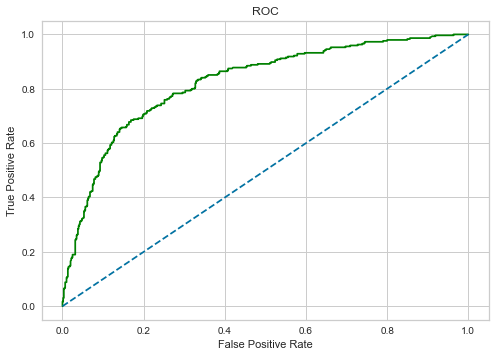

In [123]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [124]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.349944
Sales         0.188456
Product Name  0.170146
Commision     0.100971
Duration      0.093409
Age           0.067548
Type          0.020343
Destination   0.008332
Channel       0.000851


# Random Forest Conclusion

Train Data:

AUC: 87.4%

Accuracy: 82%

Precision: 74%

Recall:61%

f1-Score: 67%

Test Data:

AUC: 82.2%

Accuracy: 77%

Precision: 73%

Recall:47%

f1-Score: 58%

Training and Test set results are almost similar, and with the overall measures moderately high, the model is a good model.

Agency Code is again the most important variable for predicting Claim status

# Building a Neural Network Classifier

In [125]:
param_grid = {
    'hidden_layer_sizes': [100], # 50, 200
    'max_iter': [2500], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [126]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_
#{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [127]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)

### Predicting the Training and Testing data

In [128]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

### NN Model Performance Evaluation on Training data

In [129]:
confusion_matrix(train_labels,ytrain_predict)

array([[1289,  182],
       [ 262,  367]], dtype=int64)

In [130]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7885714285714286

In [131]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1471
           1       0.67      0.58      0.62       629

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.78      0.79      0.78      2100



In [132]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.67
nn_train_recall  0.58
nn_train_f1  0.62


Area under Curve is 0.8158261632688794


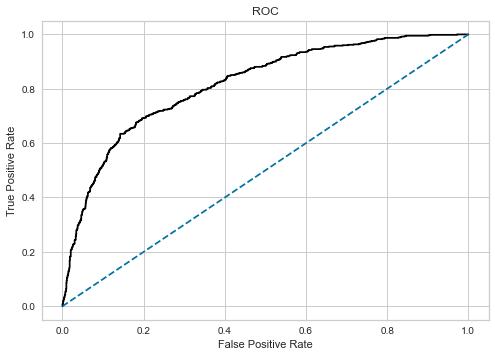

In [133]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

### NN Model Performance Evaluation on Test data


In [134]:
confusion_matrix(test_labels,ytest_predict)

array([[547,  58],
       [154, 141]], dtype=int64)

In [135]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7644444444444445

In [136]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       605
           1       0.71      0.48      0.57       295

    accuracy                           0.76       900
   macro avg       0.74      0.69      0.70       900
weighted avg       0.76      0.76      0.75       900



In [137]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.71
nn_test_recall  0.48
nn_test_f1  0.57


Area under Curve is 0.7827903067656534


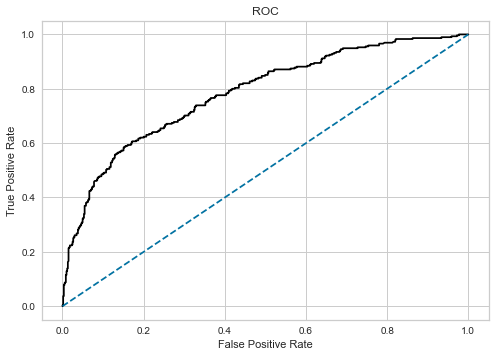

In [138]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [139]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)>

# Neural Network Conclusion

Train Data:

AUC: 87.4%

Accuracy: 79%

Precision: 67%

Recall:58%

f1-Score: 62%

Test Data:

AUC: 78.27%

Accuracy: 76%

Precision: 71%

Recall:48%

f1-Score: 57%

# Final Conclusion

### Comparison of the performance metrics from the 3 models

In [140]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.75,0.82,0.77,0.79,0.76
AUC,0.84,0.79,0.87,0.82,0.82,0.78
Recall,0.50,0.38,0.61,0.47,0.58,0.48
Precision,0.72,0.73,0.74,0.73,0.67,0.71
F1 Score,0.59,0.50,0.67,0.58,0.62,0.57


# ROC Curve for the 3 models on the Training data

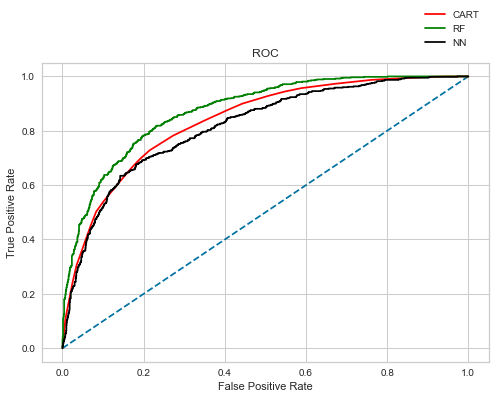

In [141]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# ROC Curve for the 3 models on the Test data

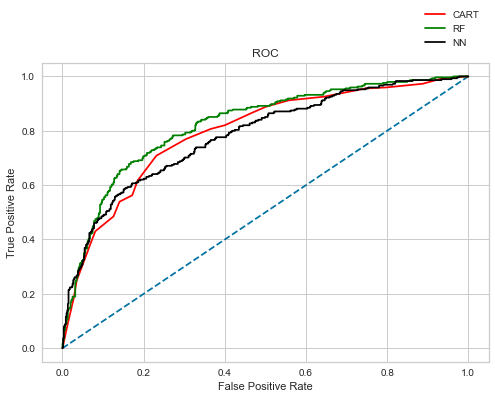

In [142]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# Final Conclusion and Business Insights:

Out of the 3 models, Random Forest has slightly better performance than the Cart and Neural network model

best_grid model has improved performance and saves processing time especially in such large datasets. 

Accuracy, AUC, Precision and Recall for test data is almost inline with training data.
This proves no overfitting or underfitting has happened, and overall the model is a good model for classification

Agency code, Sales and Product Name (in same order of preference) are the most important variables in determining if a Claim Status is Yes or No

The Overall model performance is moderate enough to start predicting if any new customer claim will be Yes or No